In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [19]:
style.use("ggplot")

In [20]:
data = pd.read_csv("student-mat.csv")

In [21]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [23]:
predict = "G3"

In [24]:
data = data[[ "G1", "G2", "G3", "studytime", "health", "famrel", "failures", "absences"]]
data = shuffle(data)

In [25]:
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

C:\Users\FJWU\AppData\Local\Temp\ipykernel_14332\49942920.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


In [26]:
best = 0
for _ in range(200): x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [37]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print("Accuracy: " + str(acc))

Accuracy: 0.8226818348261015


In [38]:
if (acc > best):
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Highest Accuracy:", best)

Highest Accuracy: 0.8226818348261015


In [39]:
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [40]:
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

-------------------------
Coefficient: 
 [ 0.15295382  0.99212343 -0.19086357  0.11006773  0.33000105 -0.19188534
  0.03759156]
Intercept: 
 -3.388764266314743
-------------------------


In [41]:
predictions = linear.predict(x_test)

In [42]:
for x in range(len(predictions)):
    print("Predicted Final grade:", predictions[x], "Data:", x_test[x], "Final grade:", y_test[x])

Predicted Final grade: 16.611951097042514 Data: [16 16  1  5  4  0  0] Final grade: 15
Predicted Final grade: 13.061038881583903 Data: [13 13  2  5  4  0  2] Final grade: 13
Predicted Final grade: 13.838205334538896 Data: [15 14  3  5  3  0  2] Final grade: 15
Predicted Final grade: 19.29475518498966 Data: [19 19  4  2  4  0  4] Final grade: 20
Predicted Final grade: 12.284187714708727 Data: [16 12  1  5  2  0  8] Final grade: 13
Predicted Final grade: 4.08546955418796 Data: [5 5 2 3 5 0 4] Final grade: 6
Predicted Final grade: 13.626707722350465 Data: [14 14  1  1  3  0  2] Final grade: 13
Predicted Final grade: 11.808282643836503 Data: [13 12  3  3  4  0  6] Final grade: 12
Predicted Final grade: 13.506720388528572 Data: [13 13  1  5  5  0  0] Final grade: 12
Predicted Final grade: 6.906172890102473 Data: [10  8  2  2  3  0  0] Final grade: 9
Predicted Final grade: 14.902920990225253 Data: [14 15  2  3  4  0  0] Final grade: 16
Predicted Final grade: 4.827051105307534 Data: [ 6  6  2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


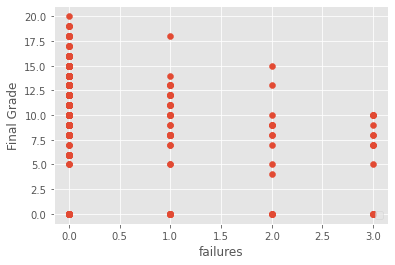

In [43]:
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()